<a href="https://colab.research.google.com/github/PaulinaAragon/ESTADISTICA/blob/main/eii_u2_02_22150580.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/PaulinaAragon/ESTADISTICA/refs/heads/main/StudentPerformanceFactors.csv')
df.dropna(inplace=True)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


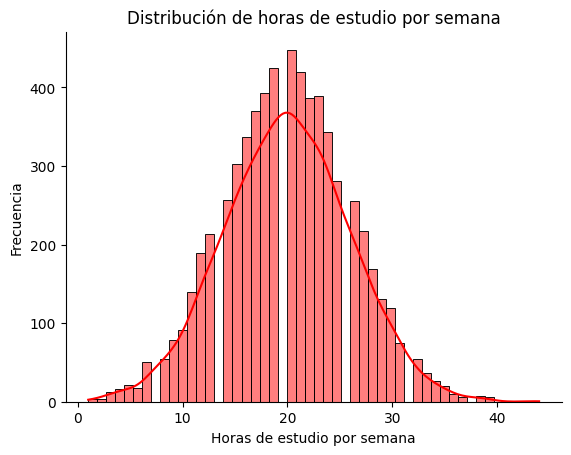

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Hours_Studied'], kde = True, color = 'red')

plt.xlabel('Horas de estudio por semana')
plt.ylabel('Frecuencia')
plt.title('Distribución de horas de estudio por semana')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

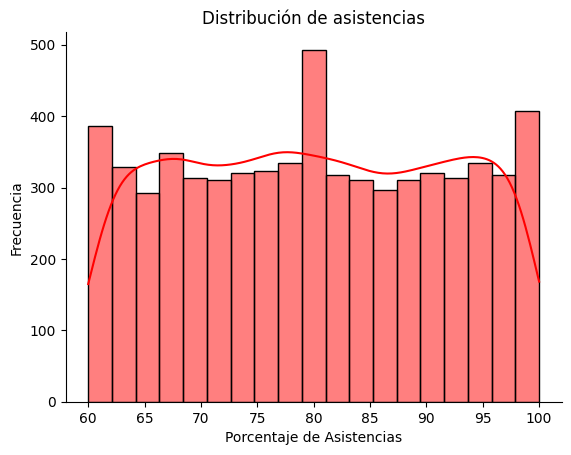

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Attendance'], kde = True, color = 'red')

plt.xlabel('Porcentaje de Asistencias')
plt.ylabel('Frecuencia')
plt.title('Distribución de asistencias')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Parental_Involvement)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Parental_Involvement),2.0,2405.587354,1202.793677,80.462228,3.086485e-35
Residual,6375.0,95297.009071,14.948550,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  High    Low  -1.7334   0.0 -2.0626 -1.4042   True
  High Medium   -0.999   0.0 -1.2636 -0.7344   True
   Low Medium   0.7344   0.0  0.4363  1.0326   True
---------------------------------------------------


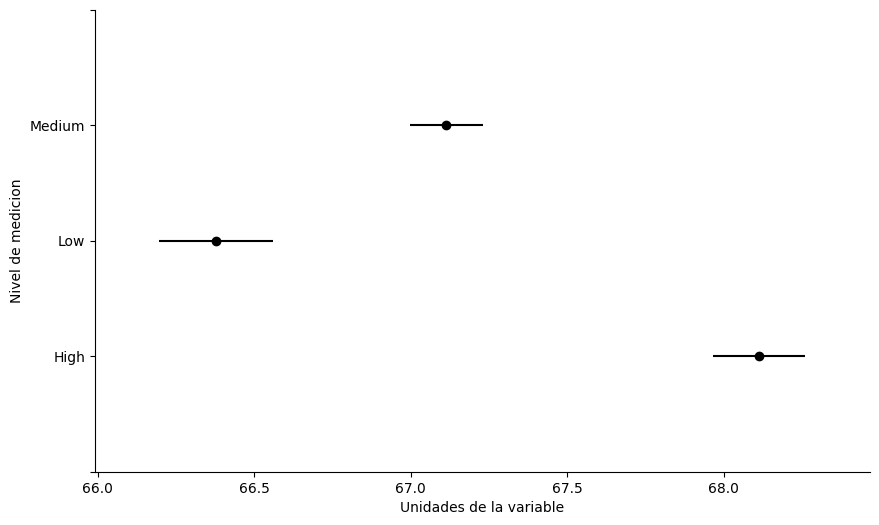

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Parental_Involvement'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [14]:
niveles = {'Low': 0, 'Medium': 50, 'High': 100}
df['Parental_Involvement'] = df['Parental_Involvement'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,50,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,100,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,50,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Access_to_Resources)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Access_to_Resources),2.0,2752.911147,1376.455574,92.41636,2.722170e-40
Residual,6375.0,94949.685278,14.894068,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0     50   0.9327   0.0  0.633 1.2323   True
     0    100   1.8795   0.0 1.5518 2.2071   True
    50    100   0.9468   0.0 0.6848 1.2088   True
-------------------------------------------------


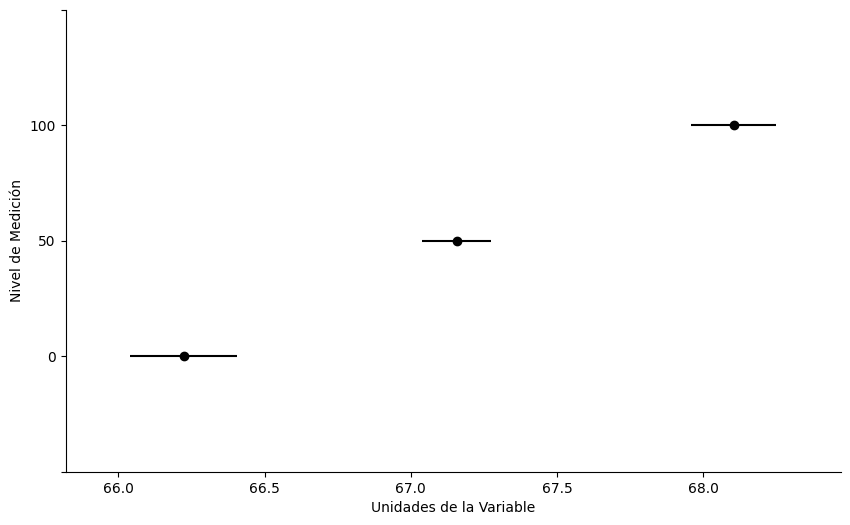

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Access_to_Resources'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de Medición', xlabel = 'Unidades de la Variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [17]:
niveles = {'Low': 0, 'Medium': 50, 'High': 100}
df['Access_to_Resources'] = df['Access_to_Resources'].map(niveles)
df


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,50,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,50,50,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,50,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,100,50,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,50,0,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Extracurricular_Activities)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Extracurricular_Activities),1.0,388.552812,388.552812,25.457916,4.646554e-07
Residual,6376.0,97314.043614,15.262554,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    No    Yes   0.5032   0.0 0.3077 0.6987   True
-------------------------------------------------


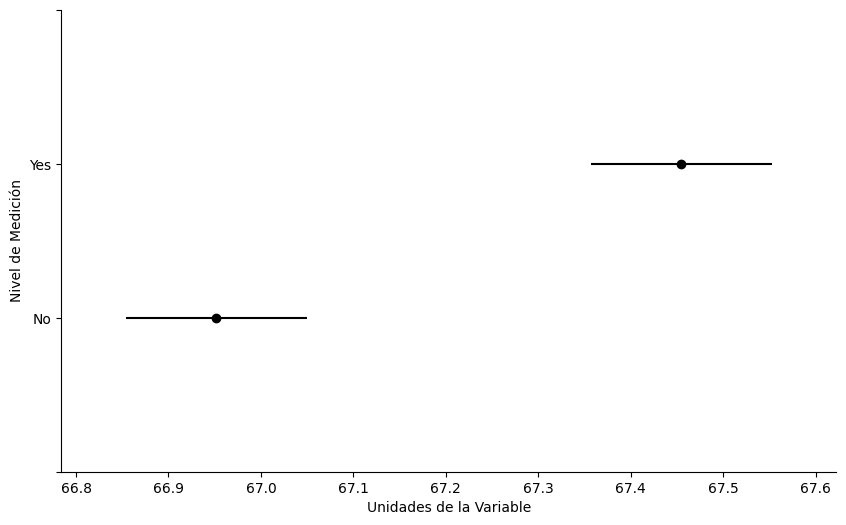

In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Extracurricular_Activities'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de Medición', xlabel = 'Unidades de la Variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)


In [21]:
niveles = {'No': 0, 'Yes': 1}
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,50,0,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,50,50,1,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,1,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,50,1,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,100,50,0,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,50,0,1,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,1,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


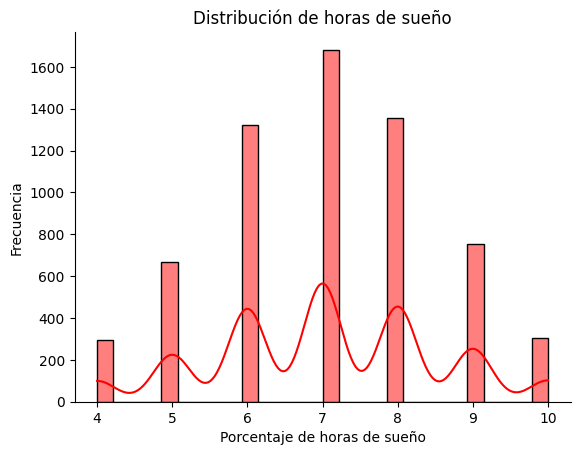

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Sleep_Hours'], kde = True, color = 'red')

plt.xlabel('Porcentaje de horas de sueño')
plt.ylabel('Frecuencia')
plt.title('Distribución de horas de sueño')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

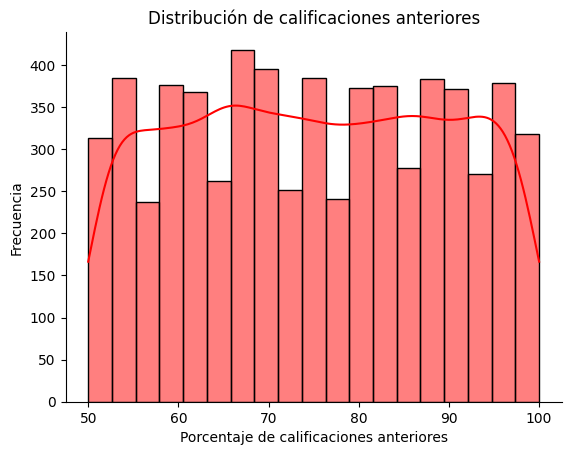

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Previous_Scores'], kde = True, color = 'red')

plt.xlabel('Porcentaje de calificaciones anteriores')
plt.ylabel('Frecuencia')
plt.title('Distribución de calificaciones anteriores')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Motivation_Level)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Motivation_Level),2.0,776.488813,388.244407,25.535515,9.000204e-12
Residual,6375.0,96926.107612,15.204095,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low  -0.9794    0.0 -1.3115 -0.6474   True
  High Medium   -0.405 0.0048 -0.7071  -0.103   True
   Low Medium   0.5744    0.0  0.3086  0.8402   True
----------------------------------------------------


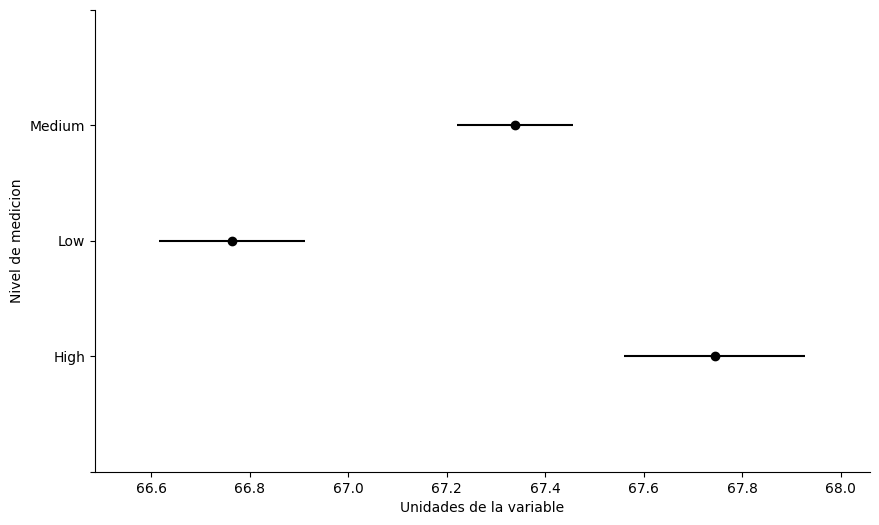

In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Motivation_Level'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [26]:
niveles = {'Low': 0, 'Medium': 50, 'High': 100}
df['Motivation_Level'] = df['Motivation_Level'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,50,0,8,59,0,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,50,50,1,7,91,50,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,1,8,98,50,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,50,1,6,65,50,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,100,50,0,8,81,50,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,50,0,1,6,65,0,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,1,6,91,100,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Internet_Access)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Internet_Access),1.0,255.358422,255.358422,16.708173,0.000044
Residual,6376.0,97447.238003,15.283444,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    No    Yes   0.7549   0.0 0.3929 1.1169   True
-------------------------------------------------


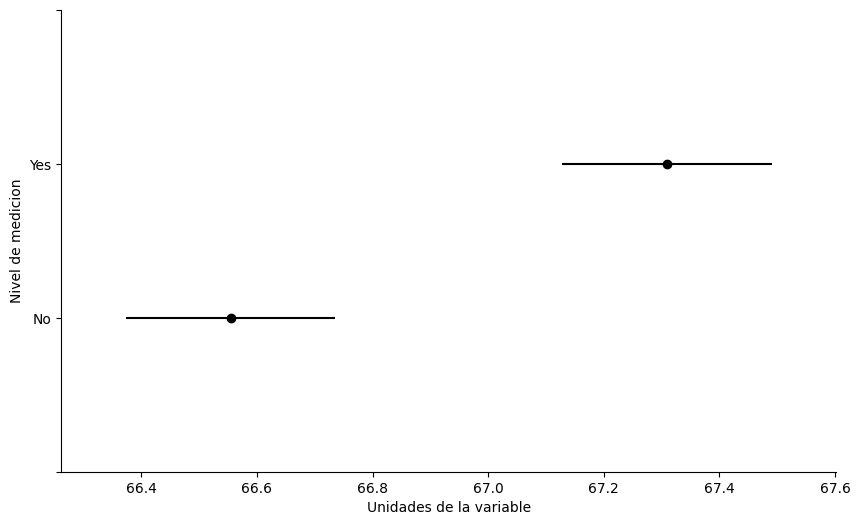

In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Internet_Access'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [29]:
niveles = {'No': 0, 'Yes': 1}
df['Internet_Access'] = df['Internet_Access'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,50,0,8,59,0,1,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,50,50,1,7,91,50,1,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,1,8,98,50,1,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,50,1,6,65,50,1,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,100,50,0,8,81,50,1,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,50,0,1,6,65,0,1,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,1,6,91,100,1,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Family_Income)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Family_Income),2.0,874.339934,437.169967,28.782492,3.597672e-13
Residual,6375.0,96828.256491,15.188746,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low  -0.9882    0.0 -1.3048 -0.6717   True
  High Medium  -0.4705 0.0015 -0.7873 -0.1536   True
   Low Medium   0.5178    0.0  0.2631  0.7725   True
----------------------------------------------------


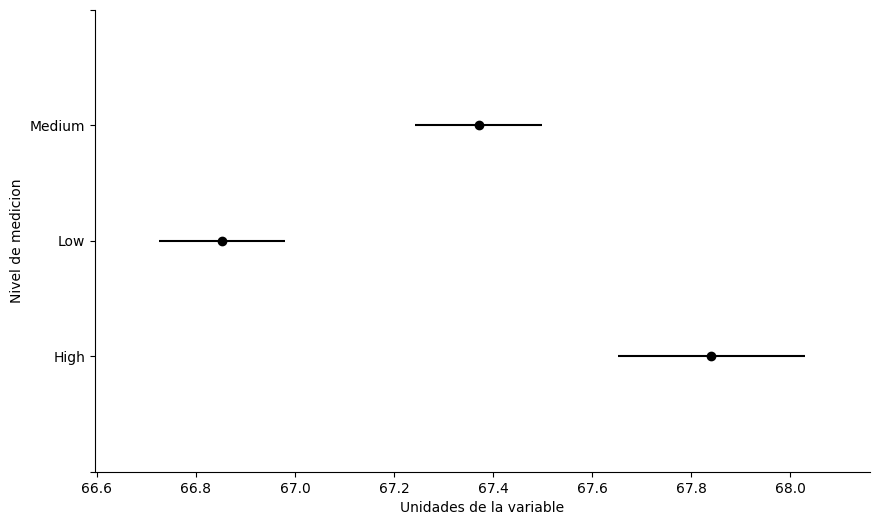

In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Family_Income'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)


In [32]:
niveles = {'Low': 0, 'Medium': 50, 'High': 100}
df['Family_Income'] = df['Family_Income'].map(niveles)
df


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,50,0,8,59,0,1,2,50,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,50,50,1,7,91,50,1,2,50,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,1,8,98,50,1,1,50,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,50,1,6,65,50,1,3,50,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,100,50,0,8,81,50,1,3,0,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,50,0,1,6,65,0,1,3,0,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,1,6,91,100,1,2,0,Medium,Private,Positive,3,No,High School,Far,Female,68


In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Teacher_Quality)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

# H0: No hay diferencia entre grupos


,df,sum_sq,mean_sq,F,PR(>F)
C(Teacher_Quality),2.0,566.739816,283.369908,18.59749,8.844704e-09
Residual,6375.0,97135.856609,15.236997,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low   -0.906    0.0 -1.3224 -0.4896   True
  High Medium  -0.5632    0.0 -0.8198 -0.3066   True
   Low Medium   0.3428 0.0971 -0.0462  0.7318  False
----------------------------------------------------


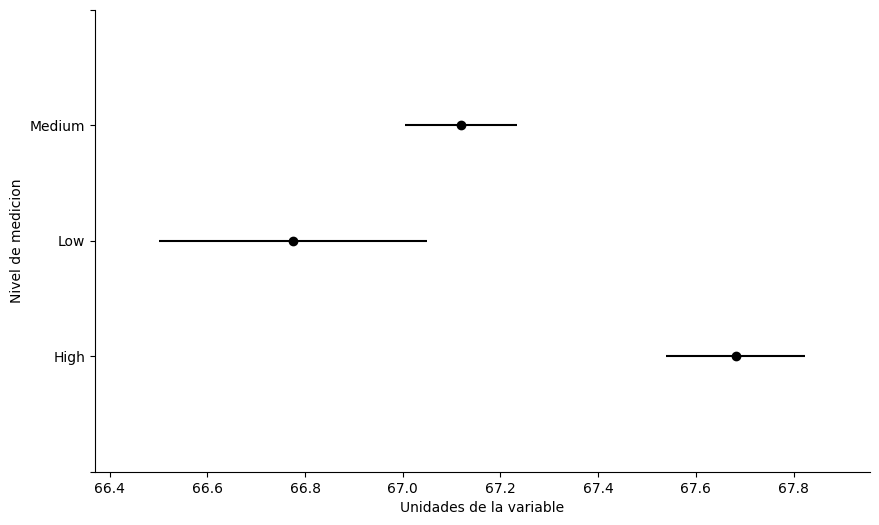

In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Teacher_Quality'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [35]:
niveles = {'Low': 0, 'Medium': 0, 'High': 1}
df['Teacher_Quality'] = df['Teacher_Quality'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,0,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,50,0,8,59,0,1,2,50,0,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,50,50,1,7,91,50,1,2,50,0,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,1,8,98,50,1,1,50,0,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,50,1,6,65,50,1,3,50,1,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,0,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,100,50,0,8,81,50,1,3,0,1,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,50,0,1,6,65,0,1,3,0,0,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,1,6,91,100,1,2,0,0,Private,Positive,3,No,High School,Far,Female,68


In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(School_Type)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(School_Type),1.0,11.540237,11.540237,0.753196,0.385499
Residual,6376.0,97691.056188,15.321684,NaN,NaN


In [37]:
df.drop(columns = ['School_Type'], inplace = True)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,0,Positive,3,No,High School,Near,Male,67
1,19,64,0,50,0,8,59,0,1,2,50,0,Negative,4,No,College,Moderate,Female,61
2,24,98,50,50,1,7,91,50,1,2,50,0,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,1,8,98,50,1,1,50,0,Negative,4,No,High School,Moderate,Male,71
4,19,92,50,50,1,6,65,50,1,3,50,1,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,0,Positive,2,No,High School,Near,Female,68
6603,23,76,100,50,0,8,81,50,1,3,0,1,Positive,2,No,High School,Near,Female,69
6604,20,90,50,0,1,6,65,0,1,3,0,0,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,1,6,91,100,1,2,0,0,Positive,3,No,High School,Far,Female,68


In [38]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Peer_Influence)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

# H0: No hay diferencia entre grupos


,df,sum_sq,mean_sq,F,PR(>F)
C(Peer_Influence),2.0,976.526155,488.263077,32.180333,1.242613e-14
Residual,6375.0,96726.070271,15.172717,NaN,NaN


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower  upper  reject
------------------------------------------------------
Negative  Neutral   0.6329    0.0 0.3229 0.9429   True
Negative Positive   1.0538    0.0  0.745 1.3626   True
 Neutral Positive   0.4209 0.0004 0.1638 0.6779   True
------------------------------------------------------


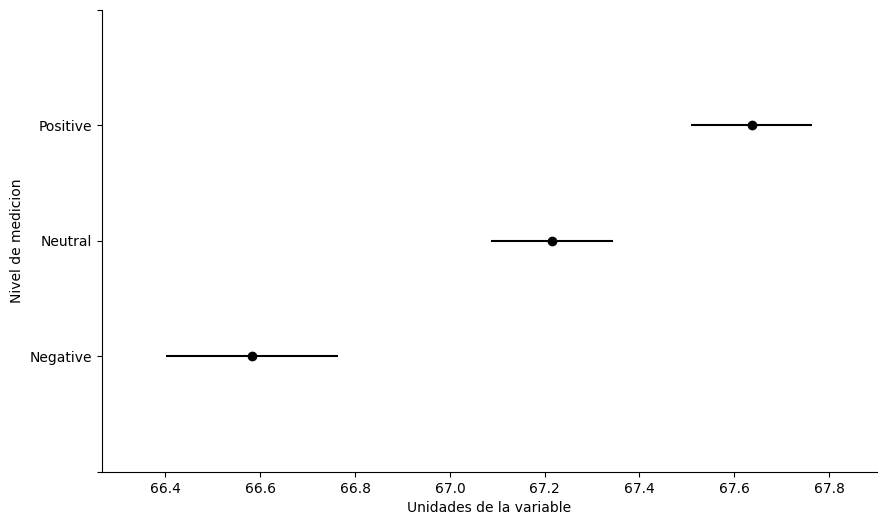

In [39]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Peer_Influence'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)


In [40]:
niveles = {'Negative': -100, 'Neutral': 0, 'Positive': 100}
df['Peer_Influence'] = df['Peer_Influence'].map(niveles)
df


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,0,100,3,No,High School,Near,Male,67
1,19,64,0,50,0,8,59,0,1,2,50,0,-100,4,No,College,Moderate,Female,61
2,24,98,50,50,1,7,91,50,1,2,50,0,0,4,No,Postgraduate,Near,Male,74
3,29,89,0,50,1,8,98,50,1,1,50,0,-100,4,No,High School,Moderate,Male,71
4,19,92,50,50,1,6,65,50,1,3,50,1,0,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,0,100,2,No,High School,Near,Female,68
6603,23,76,100,50,0,8,81,50,1,3,0,1,100,2,No,High School,Near,Female,69
6604,20,90,50,0,1,6,65,0,1,3,0,0,-100,2,No,Postgraduate,Near,Female,68
6605,10,86,100,100,1,6,91,100,1,2,0,0,100,3,No,High School,Far,Female,68


In [41]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Learning_Disabilities)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Learning_Disabilities),1.0,687.937066,687.937066,45.212618,1.921126e-11
Residual,6376.0,97014.659360,15.215599,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    No    Yes  -1.0725   0.0 -1.3852 -0.7598   True
---------------------------------------------------


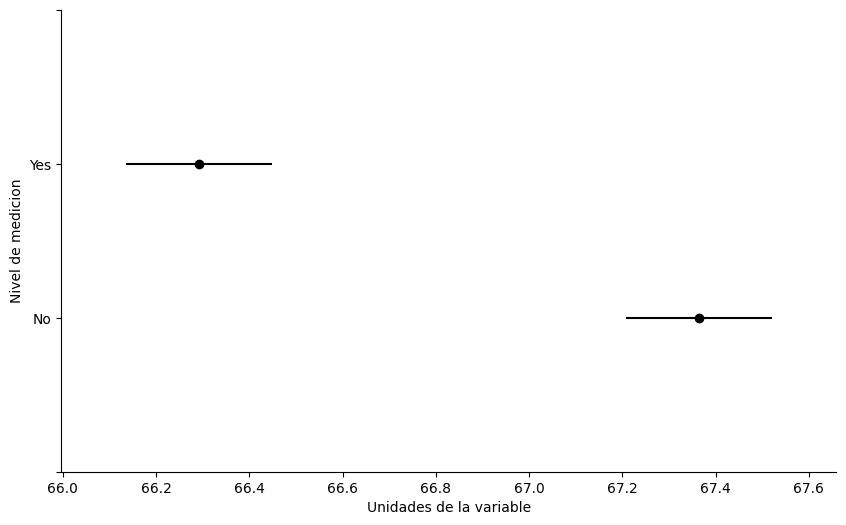

In [42]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Learning_Disabilities'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [43]:
niveles = {'No': 0, 'Yes': 1}
df['Learning_Disabilities'] = df['Learning_Disabilities'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,0,100,3,0,High School,Near,Male,67
1,19,64,0,50,0,8,59,0,1,2,50,0,-100,4,0,College,Moderate,Female,61
2,24,98,50,50,1,7,91,50,1,2,50,0,0,4,0,Postgraduate,Near,Male,74
3,29,89,0,50,1,8,98,50,1,1,50,0,-100,4,0,High School,Moderate,Male,71
4,19,92,50,50,1,6,65,50,1,3,50,1,0,4,0,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,0,100,2,0,High School,Near,Female,68
6603,23,76,100,50,0,8,81,50,1,3,0,1,100,2,0,High School,Near,Female,69
6604,20,90,50,0,1,6,65,0,1,3,0,0,-100,2,0,Postgraduate,Near,Female,68
6605,10,86,100,100,1,6,91,100,1,2,0,0,100,3,0,High School,Far,Female,68


In [44]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Parental_Education_Level)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Parental_Education_Level),2.0,1089.555877,544.777939,35.947108,2.990498e-16
Residual,6375.0,96613.040548,15.154987,NaN,NaN


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower   upper  reject
---------------------------------------------------------------
    College  High School  -0.4635 0.0001 -0.7268 -0.2002   True
    College Postgraduate   0.6142    0.0  0.2856  0.9429   True
High School Postgraduate   1.0778    0.0  0.7754  1.3801   True
---------------------------------------------------------------


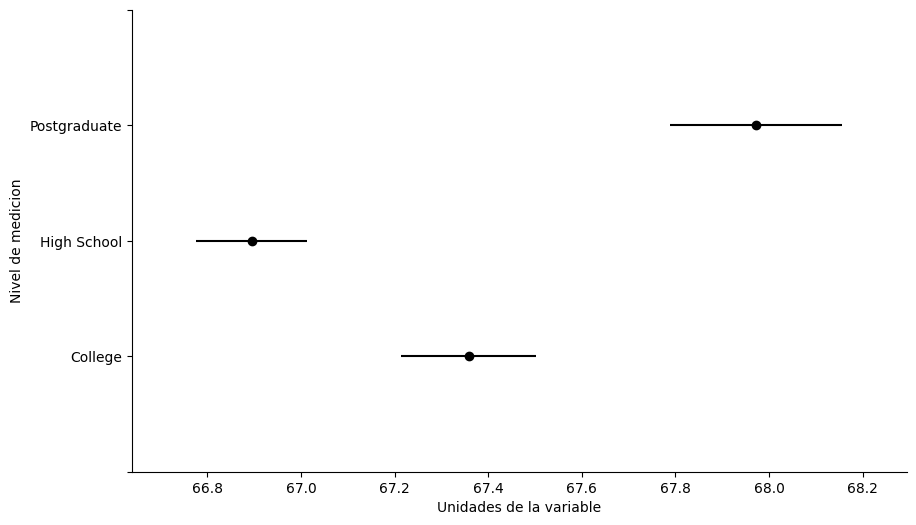

In [45]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Parental_Education_Level'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [46]:
niveles = {'High School': 1, 'College': 2, 'Postgraduate': 3}
df['Parental_Education_Level'] = df['Parental_Education_Level'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,0,100,3,0,1,Near,Male,67
1,19,64,0,50,0,8,59,0,1,2,50,0,-100,4,0,2,Moderate,Female,61
2,24,98,50,50,1,7,91,50,1,2,50,0,0,4,0,3,Near,Male,74
3,29,89,0,50,1,8,98,50,1,1,50,0,-100,4,0,1,Moderate,Male,71
4,19,92,50,50,1,6,65,50,1,3,50,1,0,4,0,2,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,0,100,2,0,1,Near,Female,68
6603,23,76,100,50,0,8,81,50,1,3,0,1,100,2,0,1,Near,Female,69
6604,20,90,50,0,1,6,65,0,1,3,0,0,-100,2,0,3,Near,Female,68
6605,10,86,100,100,1,6,91,100,1,2,0,0,100,3,0,1,Far,Female,68


In [47]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Distance_from_Home)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Distance_from_Home),2.0,758.421410,379.210705,24.936704,1.630308e-11
Residual,6375.0,96944.175015,15.206929,NaN,NaN


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1   group2  meandiff p-adj lower  upper  reject
-----------------------------------------------------
     Far Moderate   0.4882 0.017 0.0705 0.9059   True
     Far     Near   1.0154   0.0 0.6237  1.407   True
Moderate     Near   0.5272   0.0 0.2722 0.7822   True
-----------------------------------------------------


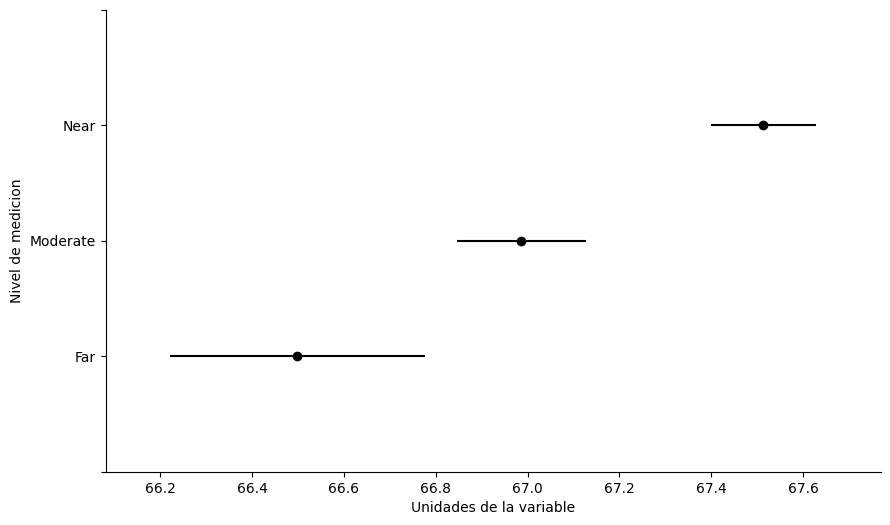

In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(endog = df['Exam_Score'], groups = df['Distance_from_Home'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [49]:
niveles = {'Far': 3, 'Moderate': 2, 'Near': 1}
df['Distance_from_Home'] = df['Distance_from_Home'].map(niveles)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,0,100,3,0,1,1,Male,67
1,19,64,0,50,0,8,59,0,1,2,50,0,-100,4,0,2,2,Female,61
2,24,98,50,50,1,7,91,50,1,2,50,0,0,4,0,3,1,Male,74
3,29,89,0,50,1,8,98,50,1,1,50,0,-100,4,0,1,2,Male,71
4,19,92,50,50,1,6,65,50,1,3,50,1,0,4,0,2,1,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,0,100,2,0,1,1,Female,68
6603,23,76,100,50,0,8,81,50,1,3,0,1,100,2,0,1,1,Female,69
6604,20,90,50,0,1,6,65,0,1,3,0,0,-100,2,0,3,1,Female,68
6605,10,86,100,100,1,6,91,100,1,2,0,0,100,3,0,1,3,Female,68


In [50]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Exam_Score ~ C(Gender)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)  # ANOVA de una via
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0,2.377044,2.377044,0.155128,0.693696
Residual,6376.0,97700.219381,15.323121,NaN,NaN


In [51]:
df.drop(columns = ['Gender'], inplace = True)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score
0,23,84,0,100,0,7,73,0,1,0,0,0,100,3,0,1,1,67
1,19,64,0,50,0,8,59,0,1,2,50,0,-100,4,0,2,2,61
2,24,98,50,50,1,7,91,50,1,2,50,0,0,4,0,3,1,74
3,29,89,0,50,1,8,98,50,1,1,50,0,-100,4,0,1,2,71
4,19,92,50,50,1,6,65,50,1,3,50,1,0,4,0,2,1,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,100,50,0,7,76,50,1,1,100,0,100,2,0,1,1,68
6603,23,76,100,50,0,8,81,50,1,3,0,1,100,2,0,1,1,69
6604,20,90,50,0,1,6,65,0,1,3,0,0,-100,2,0,3,1,68
6605,10,86,100,100,1,6,91,100,1,2,0,0,100,3,0,1,3,68


Text(0.5, 1.0, 'Matriz de correlacion')

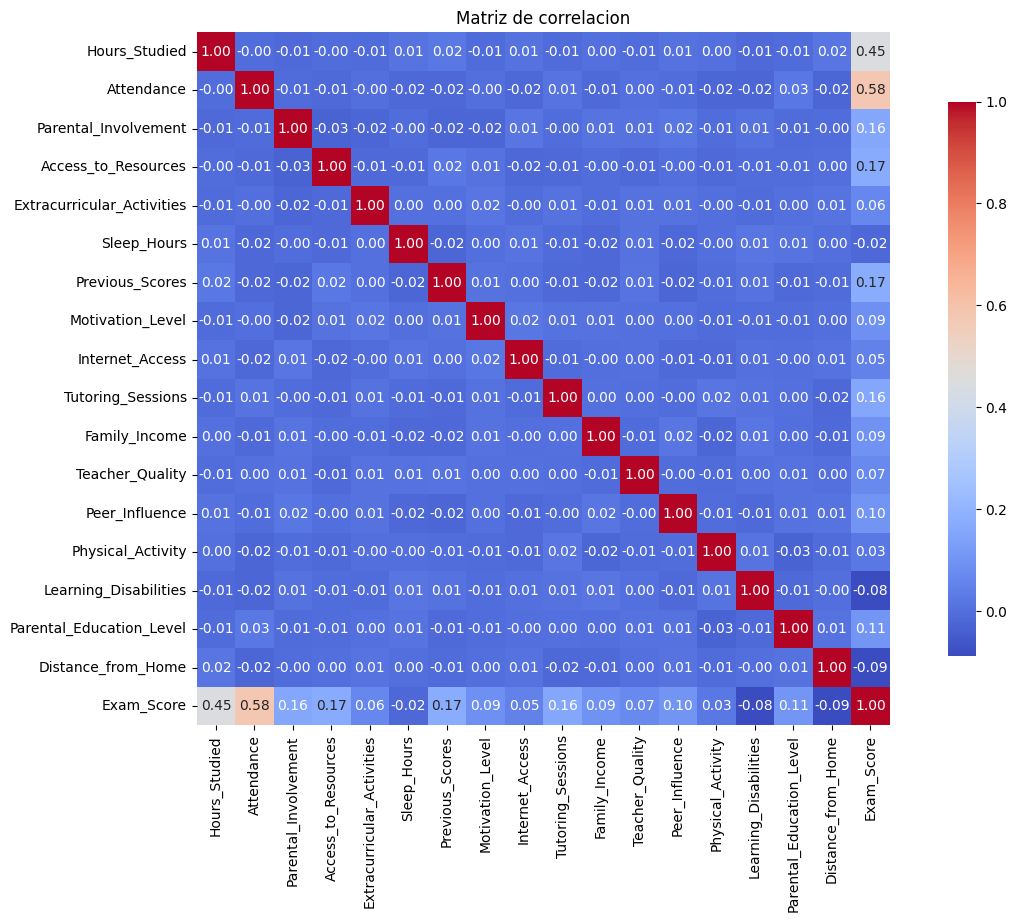

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_de_correlacion = df.corr()
plt.figure(figsize = (15, 9))
sns.heatmap(matriz_de_correlacion, annot = True, cmap = 'coolwarm', fmt = "0.2f", square = True, cbar_kws = {'shrink': 0.8})
plt.title('Matriz de correlacion')


Coeficiente de determinacion:  0.6961


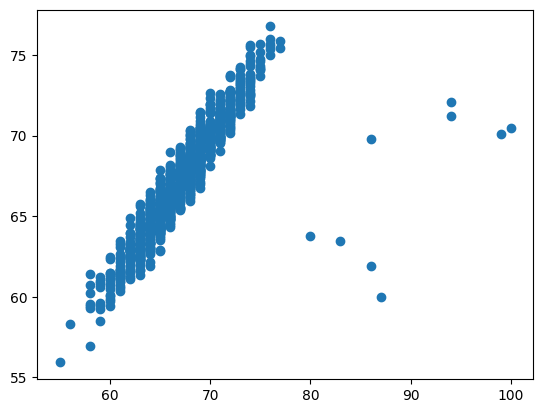

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = df[['Hours_Studied','Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Previous_Scores', 'Tutoring_Sessions', 'Peer_Influence', 'Parental_Education_Level']]
Y = df['Exam_Score']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(Y_train, X_train_constante).fit()

Yc = modelo.predict(X_test_constante)

plt.scatter(Y_test, Yc)

r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de determinacion: {r2: 0.4f}')


In [54]:
b0, b1, b2, b3, b4, b5, b6, b7, b8 = modelo.params

Fun = lambda X1, X2, X3, X4, X5, X6, X7, X8: b0 + b1 * X1 + b2 * X2 + b3 * X3 + b4 * X4 + b5 * X5 + b6 * X6 + b7 * X7 + b8 * X8

Fun(15, 50, 50 ,50, 70, 2, 0,2)

59.70596737499724

In [55]:
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(modelo.resid, X_train_constante)
print(f'Valor-p de Breusch-Pagan: {valor_p_bp: 0.4f}')

Valor-p de Breusch-Pagan:  0.9857


In [56]:
from statsmodels.formula.api import ols
moedo_2 = ols(formula = 'Exam_Score ~ Hours_Studied + Attendance + Parental_Involvement + Access_to_Resources + Previous_Scores + Tutoring_Sessions + Peer_Influence + Parental_Education_Level', data = df).fit()
tabla_anova = sm.stats.anova_lm(moedo_2, typ = 2)  # ANOVA de una via
tabla_anova

,sum_sq,df,F,PR(>F)
Hours_Studied,19656.459438,1.0,3926.538896,0.000000e+00
Attendance,33458.894402,1.0,6683.688418,0.000000e+00
Parental_Involvement,3013.273678,1.0,601.926117,4.339123e-127
Access_to_Resources,3183.225000,1.0,635.875287,8.081939e-134
Previous_Scores,3137.157855,1.0,626.672997,5.351043e-132
Tutoring_Sessions,2489.892861,1.0,497.376509,3.757044e-106
Peer_Influence,970.566353,1.0,193.878585,1.951327e-43
Parental_Education_Level,909.735093,1.0,181.727042,7.360945e-41
Residual,31883.547692,6369.0,NaN,NaN


'Hours_Studied', Distribucion normal, no se aprecian datos atipicos

 'Attendance', Distribucion normal, no se aprecian datos atipicos

 'Parental_Involvement', Niveles de medicion Low:0, Medium:50, High:100
        Segun aumenta la participacion parental, se observa un incremento en la calificacion del alumno

 'Access_to_Resources', Niveles de medicion Low:0, Medium:50, High:100
        Segun aumenta el acceso a resursos, se observa un incremento en la calificacion del alumno

 'Extracurricular_Activities', Niveles de medicion NO: 0, YES: 1
        Segun el estudiante realiza actividades extraescolares, se observan mejores calificaciones

 'Sleep_Hours', Distribucion normal, variable discreta no se aprecian valores atipicos

 'Previous_Scores', Distribucion uniforme, no se aprecian valores atipicos

 'Motivation_Level', Niveles de medicion Low:0, Medium:50, High:100
        Segun aumenta la motivacion, se observa un incremento en la calificacion del alumno

 'Internet_Access', Niveles de medicion NO: 0, YES: 1
        Segun el estudiante tiene acceso a internet, se observan mejores calificaciones

 'Tutoring_Sessions', Distribucion gamma, no se aprecian valores atipicos, valores discretos

 'Family_Income', Niveles de medicion Low:0, Medium:50, High:100
        Segun aumenta el ingreso familiar, se observa un incremento en la calificacion del alumno

 'Teacher_Quality', Niveles de medicion Low-Medium:0, High:1
      La calidad del profesor aumenta, se observa un incremento en la calificacion del alumno

 'School_Type', No hay diferencia entre grupos

 'Peer_Influence', Niveles de medicion Negative:-100, Neutral:0, Positive:100
        Segun aumenta la influencia de los compañeros, se observa un incremento en la calificacion del alumno

 'Physical_Activity', Distribucion normal, no se aprecian datos atipicos

 'Learning_Disabilities', Niveles de medicion NO: 0, YES: 1

 'Parental_Education_Level', Niveles de medicion High School:1, Collage:2, Postgraduated:3
        Segun aumenta el nivel educativo de los padres, se observa un incremento en la calificacion del alumno

 'Distance_from_Home', Niveles de medicion Far:3, Moderate:2, Near:1
        Segun aumenta la distancia de casa, se observa un incremento en la calificacion del alumno

 'Gender', No hay diferencia entre grupos
 'Exam_Score' Distribucion normal, no se aprecian datos atipicos
